# Проект по анализу данных. Полонецкий Илья

"Сюжет всегда убьет краску, и мы ее не заметим" -- Казимир Малевич.

Цвет является основой любого произвдеения изобразительного искусства. Даже минимизация роли цвета до штрихов карандаша не может отнять ключевой роли контрастов и красок в создании эмоциональной силы произведения.

Но есть ли тенденции в использовании цветов в искусстве? Будет ли один автор прибегать к единой палитре всю свою жизнь или набор красок будет меняться с каждым новым холстом? На эти и многие другие вопросы я бы хотел ответить, прибегнув к анализу различных произведений искусства.

Начать я бы хотел с анализа датасета, состоящего из картин 50 самых влиятельных художников всех времен (уточним: самых влиятельных по мнению автора датасета, но выбор достаточно конвенциональный, так что, мне кажется, что датасет отлично подходит для анализа).

Датасет огромный, так что просто прикладываю ссылку, а работаю с датасетом локально.

https://www.kaggle.com/datasets/ikarus777/best-artworks-of-all-time

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #Импортируем основные библиотеки

df = pd.read_csv("D:/Project/artists.csv") #считываем датасет

In [2]:
df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


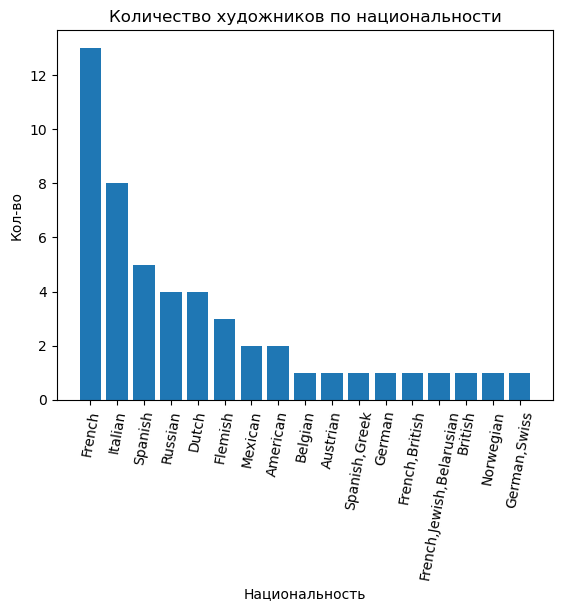

In [158]:
import seaborn as sns

# Посмотрим на то, художников какой национальности в списке больше.
nationality_counts = df["nationality"].value_counts()
plt.bar(nationality_counts.index, nationality_counts.values)
plt.title("Количество художников по национальности")
plt.xlabel("Национальность")
plt.ylabel("Кол-во")
plt.xticks(rotation=80)
plt.show()



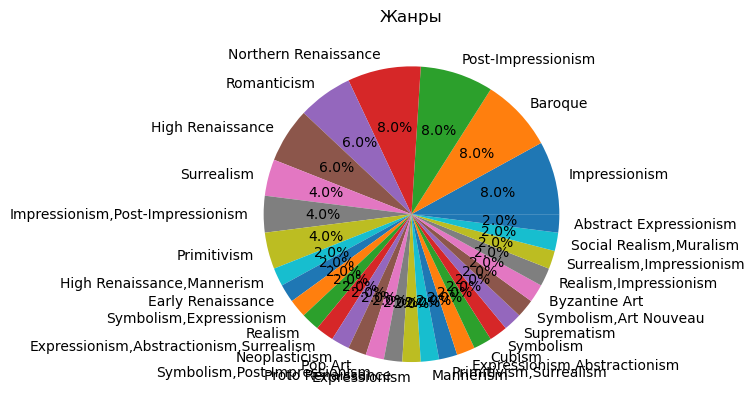

In [162]:
# А сейчас давайте посмотрим на то, в каких жанрах работали художники.
genre_counts = df["genre"].value_counts()
plt.pie(genre_counts.values, labels=genre_counts.index, autopct="%1.1f%%")
plt.title("Жанры")
plt.show()


Видим одно неудобство, связанное с датасетом, -- в нём к художнику могут относить сразу несколько жанров. Из-за этого наши таблицы, созданные выще, становятся менее аккуратными и иллюстративными. Чтобы исправить эту проблему, давайте воспользуемся функционалом SQL.

In [199]:
import sqlite3 #Импортируем SQLite

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создаём новую таблицу
cursor.execute('CREATE TABLE different_genres (name TEXT, genre TEXT)')

# Делим столбец жанров
for index, row in df.iterrows():
    name = row['name']
    genres = row['genre'].split(',')
    for genre in genres:
        cursor.execute('INSERT INTO different_genres VALUES (?, ?)', (name, genre))

conn.commit()

# Копируем таблицу в новый датафрейм
df_diff_genres = pd.read_sql_query('SELECT * FROM different_genres', conn)

conn.close()

In [200]:
df_diff_genres

,name,genre
0,Amedeo Modigliani,Expressionism
1,Vasiliy Kandinskiy,Expressionism
2,Vasiliy Kandinskiy,Abstractionism
3,Diego Rivera,Social Realism
4,Diego Rivera,Muralism
...,...,...
58,Paul Gauguin,Symbolism
59,Paul Gauguin,Post-Impressionism
60,Raphael,High Renaissance
61,Michelangelo,High Renaissance


Отлично! Теперь у нас есть датафрейм с отдельно написанными жанрами. Сделаем новый пайчарт.

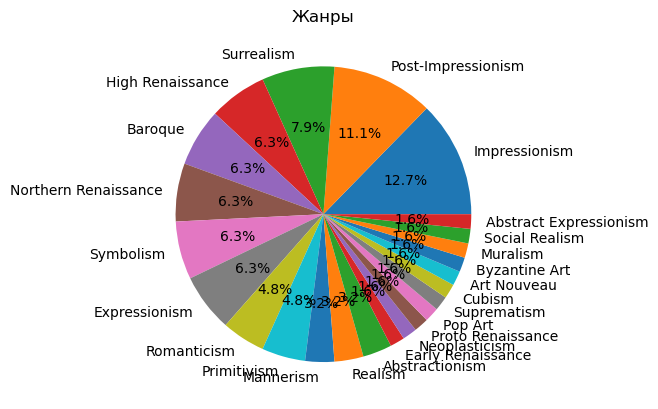

In [201]:
genre_counts = df_diff_genres["genre"].value_counts()
plt.pie(genre_counts.values, labels = genre_counts.index, autopct = "%1.1f%%")
plt.title("Жанры")
plt.show()

Видим явное преобладание искусства 19-20 веков.

Дальше было бы интересно посмотреть, а есть ли корреляция между национальностью художника и жанрами, в которых он работает. Для этого еще раз используем SQL, создав таблицу с разделенными жанрами и национальностями.

In [186]:
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создаём новую таблицу
cursor.execute('CREATE TABLE diff_genres_nationalities (name TEXT, genre TEXT, nationality TEXT)')

# Делим столбец жанров
for index, row in df.iterrows():
    name = row['name']
    genres = row['genre'].split(',')
    nationalities = row['nationality'].split(',')
    for genre in genres:
        for nationality in nationalities:
            cursor.execute('INSERT INTO diff_genres_nationalities VALUES (?, ?, ?)', (name, genre, nationality))

conn.commit()

# Копируем таблицу в новый датафрейм
df_diff_genres_nationalities = pd.read_sql_query('SELECT * FROM diff_genres_nationalities', conn)

conn.close()

In [202]:
df_diff_genres_nationalities

,name,genre,nationality
0,Amedeo Modigliani,Expressionism,Italian
1,Vasiliy Kandinskiy,Expressionism,Russian
2,Vasiliy Kandinskiy,Abstractionism,Russian
3,Diego Rivera,Social Realism,Mexican
4,Diego Rivera,Muralism,Mexican
...,...,...,...
65,Paul Gauguin,Symbolism,French
66,Paul Gauguin,Post-Impressionism,French
67,Raphael,High Renaissance,Italian
68,Michelangelo,High Renaissance,Italian


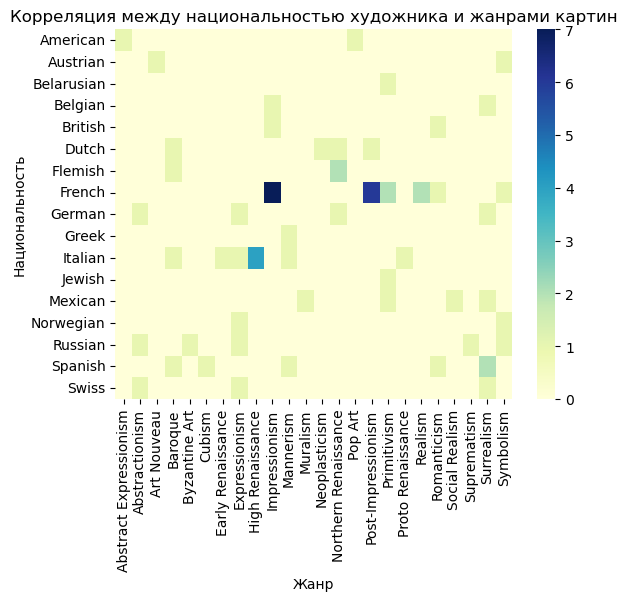

In [203]:

# Строим карту корреляций между национальностью и жанром
cross_tab = pd.crosstab(df_diff_genres_nationalities["nationality"], df_diff_genres_nationalities["genre"])
sns.heatmap(cross_tab, cmap="YlGnBu")
plt.title("Корреляция между национальностью художника и жанрами картин")
plt.xlabel("Жанр")
plt.ylabel("Национальность")
plt.show()

## Палитры.

### Часть 1. Создание палетки.

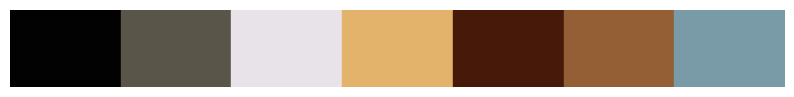

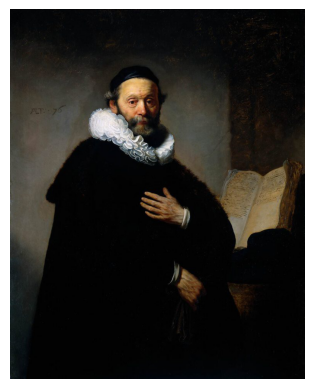

In [204]:
from PIL import Image
import extcolors
# Импортируем нужные бибилотеке

# Загружаем картину
image = Image.open(r'D:\Project\resized\resized\Rembrandt_129.jpg')

colors, pixel_count = extcolors.extract_from_path(r'D:\Project\resized\resized\Rembrandt_129.jpg', limit = 10)
# Из картины "извлекаются" преобладающие на ней цвета в порядке убывания своей доли на картине

# Создаем палетку
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float)
    ax.add_patch(rect)
plt.xlim((0, len(colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()


plt.imshow(image)
plt.axis('off')
plt.show()

Мы увидели как именно работает создание палетки цветов на примере одной из картин Рембрандта. Несложно заметить, что наиболее популярные цвета программа находит точно. Также, программа сразу расставляет цвета в порядке от наиболее популярного к наименее (с учетом в ограничение в 10 цветов, которое я ставлю). 

Сейчас давайте создадим функцию, которая будет сразу добавлять оттенки в отдельный список. 

In [76]:
all_colors = []

In [73]:
def extracting_colors(path):
    
    global all_colors
    
    image = Image.open(path)
    
    colors, pixel_count = extcolors.extract_from_path(path, limit = 10)
    
    all_colors += colors

### Часть 2. Пикассо.

Со страницы в Википедии я скачиваю 13 популярных работ Пабло Пикассо, созданных с 1901 по 1904. Этот период творчества художника часто именуют "Голубым" из-за превалирующей роли данного цвета в картинах испанца. Давайте проверим, правда ли именно голубой цвет является главных в этот период.

Источник работ: https://en.wikipedia.org/wiki/Picasso%27s_Blue_Period

In [77]:
for i in range(1, 14):
    extracting_colors(f'D:/Project/Picasso_blue/Picasso_{i}.jpg')

Программа добавляет до 10 цветов с каждой из картин в один список.

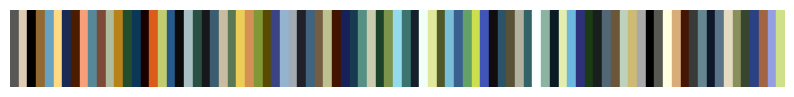

In [78]:
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(all_colors):
    color_float = tuple(c/255 for c in color[0])p
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float)
    ax.add_patch(rect)
plt.xlim((0, len(all_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Провести анализ на основе настолько перемешанной палитры сложно -- давайте её отсортируем.

In [79]:
sorted_colors = sorted(all_colors)

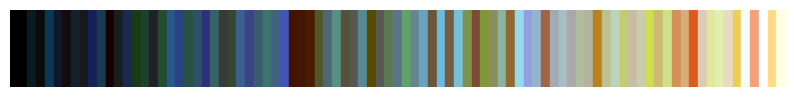

In [80]:
#Создаём палетку
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Спорная ситуация -- большое количество синего цвета очевидно, но для полноценного анализа нам нужно: 
1. Сравнить эту палитру с палитрой другого периода творчества
2. Сравнить палитры с палитрой по выборе из более чем 400 картин Пикассо разных периодов творчества. 

In [83]:
all_colors = [] #обновляем наш список для сбора цветов

Давайте посмотрим на картины 1904-1906 годов -- "Розовый период" Пикассо. Источник картин: https://en.wikipedia.org/wiki/Picasso%27s_Rose_Period

In [84]:
for i in range(1, 16):
    extracting_colors(f'D:/Project/Picasso_pink/Picasso_{i}.jpg')

Не будем тратить время -- сразу отсортируем список цветов.

In [85]:
sorted_colors = sorted(all_colors)

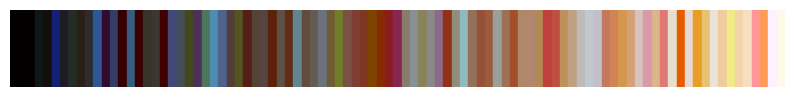

In [86]:
#Создаём палетку
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

И сейчас названия периодов становятся нам более ясным -- и правда, оранжевый, желтый и розовый преобладаают на картинах этого периода, а синего становится заметно меньше -- палетки цветов это явно демонстрируют. Но этого мало -- давайте посмотрим палетку по выборке из 439 (!!!) картин великого художника. Итак, начнём...

In [88]:
all_colors = [] #обновляем наш список для сбора цветов

In [89]:
for i in range(1, 440):
    extracting_colors(f'D:/Project/resized/resized/Pablo_Picasso_{i}.jpg')

In [90]:
sorted_colors = sorted(all_colors)

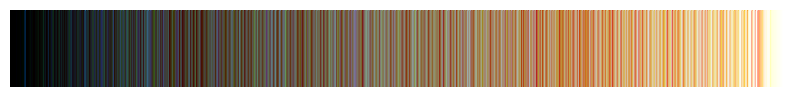

In [91]:
#Создаём палетку
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Видим интересную ситуацию -- различные оттенки розового, желтого и оранжевого преобладают на многих картинах художника. Палитра, которую мы видим, не так далеко уходит от палитры отдельного "Розового" периода. Но может это вызвано большим количеством цветов от одной картины. Может, если мы будем выбирать три самых популярных оттенка произведений, то ситуация поменяется? Давайте проверим.

In [92]:
def extracting_colors(path, num_colors):
    
    global all_colors
    
    image = Image.open(path)

    
    colors, pixel_count = extcolors.extract_from_path(path, limit = num_colors)
    
    
    all_colors += colors

In [93]:
all_colors = []

In [94]:
for i in range(1, 440):
    extracting_colors(f'D:/Project/resized/resized/Pablo_Picasso_{i}.jpg', 3)

In [95]:
sorted_colors = sorted(all_colors)

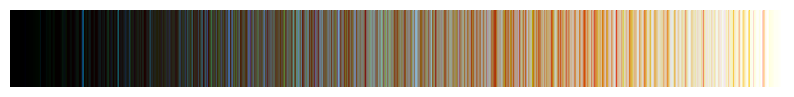

In [96]:
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Палитра изменилась -- ограничившись тремя цветами от картины мы получили больше темных оттенков. Если сравнить эта палетку с палетками за "Голубой" и "Розовый" периоды, то мы можем отметить целесообразность подобных названий -- соотвествующих оттенков правда становится больше. Однако, как мы видим, эти цвета "идут" с Пикассо через всю его творческую карьеру и их он использовал очень часто, хоть и меньше, чем в вышеупомянутые периоды творчества. 

### Часть 3. Палитры разных стран.

Давайте используем SQLite, чтобы преобразовать исходную таблицу.

In [103]:
import sqlite3

conn = sqlite3.connect('mydatabase.db')

df.to_sql('new_table', conn) # Переводим датафрэйм в формат таблицы

cursor = conn.cursor()
cursor.execute('ALTER TABLE new_table DROP COLUMN bio')
cursor.execute('ALTER TABLE new_table DROP COLUMN wikipedia')
# Удаляем два столбца, которые нам не понадобятся

sorted_df = pd.read_sql_query('SELECT * FROM new_table ORDER BY nationality', conn)
# Сортируем таблицу по столбцу "национальность"

conn.close()

In [205]:
sorted_df.head(10)

,index,id,name,years,genre,nationality,paintings
0,45,45,Andy Warhol,1928 – 1987,Pop Art,American,181
1,49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,24
2,9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,117
3,4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194
4,36,36,William Turner,1775 - 1851,Romanticism,British,66
5,8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,877
6,10,10,Hieronymus Bosch,1450 - 1516,Northern Renaissance,Dutch,137
7,31,31,Rembrandt,1606 - 1669,Baroque,Dutch,262
8,43,43,Piet Mondrian,1872 – 1944,Neoplasticism,Dutch,84
9,14,14,Peter Paul Rubens,1577 - 1640,Baroque,Flemish,141


Давайте посмотрим, какой цвет преобладает в работах испанцев из нашего списка.

In [137]:
nationality = 'Spanish'
df_filtered = sorted_df[sorted_df['nationality'] == nationality]
# Посмотрим на список испанцев в датафрэйме

df_filtered

,index,id,name,years,genre,nationality,paintings
44,5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,139
45,13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,439
46,16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,291
47,27,27,Diego Velazquez,1599 - 1660,Baroque,Spanish,128
48,44,44,Joan Miro,1893 – 1983,Surrealism,Spanish,102


In [208]:
all_colors = []

for i in range(1, 140):
    extracting_colors(f'D:/Project/resized/resized/Salvador_Dali_{i}.jpg', 1)
for i in range(1, 292):
    extracting_colors(f'D:/Project/resized/resized/Francisco_Goya_{i}.jpg', 1)
for i in range(100, 129):
    extracting_colors(f'D:/Project/resized/resized/Diego_Velazquez_{i}.jpg', 1)
for i in range(1, 103):
    extracting_colors(f'D:/Project/resized/resized/Joan_Miro_{i}.jpg', 1)

Примечание: компьютеру не хватило памяти, чтобы сразу проанализировать 5 испанских художников, так что уже проанализированного Пикассо из списка я убрал (и сразу стало на 400+ картин меньше...)

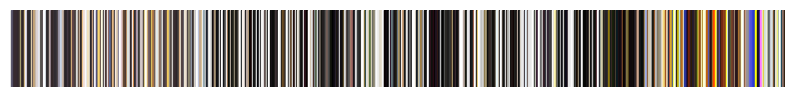

In [210]:
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(all_colors):
    color_float = tuple(c/255 for c in color[0])
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float)
    ax.add_patch(rect)
plt.xlim((0, len(all_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

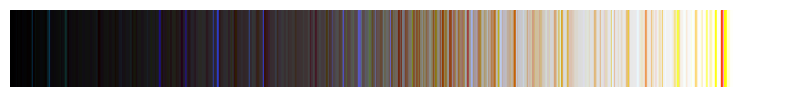

In [211]:
sorted_colors = sorted(all_colors)

fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Чёрного цвета почти везде много, но вот выделяется тут большое количество белого цвета. Итак, Испания -- белый цвет.

Дальше давайте посмотрим на Францию.

In [212]:
nationality = 'French'
df_filtered = sorted_df[sorted_df['nationality'] == nationality]

df_filtered

,index,id,name,years,genre,nationality,paintings
12,3,3,Claude Monet,1840 - 1926,Impressionism,French,73
13,6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,90
14,15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,336
15,28,28,Henri Matisse,1869 - 1954,"Impressionism,Post-Impressionism",French,186
16,30,30,Edgar Degas,1834 - 1917,Impressionism,French,702
17,33,33,Henri de Toulouse-Lautrec,1864 – 1901,Post-Impressionism,French,81
18,34,34,Gustave Courbet,1819 - 1877,Realism,French,59
19,35,35,Camille Pissarro,1830 - 1903,"Impressionism,Post-Impressionism",French,91
20,38,38,Paul Cezanne,1839 – 1906,Post-Impressionism,French,47
21,39,39,Eugene Delacroix,1798 – 1863,Romanticism,French,31


Французов тут много, а память на компьютере не бесконечная, так что давайте рассмотрим только 6 художников, ограничивая количество картин некоторых авторов.

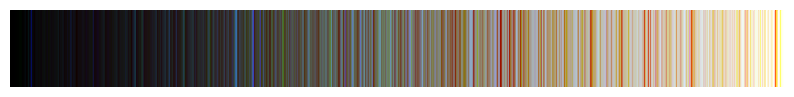

In [213]:
all_colors = []

for i in range(1, 74):
    extracting_colors(f'D:/Project/resized/resized/Claude_Monet_{i}.jpg', 2)
for i in range(1, 91):
    extracting_colors(f'D:/Project/resized/resized/Edouard_Manet_{i}.jpg', 2)
for i in range(1, 101):
    extracting_colors(f'D:/Project/resized/resized/Henri_Matisse_{i}.jpg', 2)
for i in range(1, 60):
    extracting_colors(f'D:/Project/resized/resized/Gustave_Courbet_{i}.jpg', 2)
for i in range(1, 48):
    extracting_colors(f'D:/Project/resized/resized/Paul_Cezanne_{i}.jpg', 2)
for i in range(1, 100):
    extracting_colors(f'D:/Project/resized/resized/Paul_Gauguin_{i}.jpg', 2)
    
sorted_colors = sorted(all_colors)

fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

В случае с Францией можем заметить преобладание жёлтого цвета. Франция -- жёлтый цвет.

Дальше рассмотрим США.

In [214]:
nationality = 'American'
df_filtered = sorted_df[sorted_df['nationality'] == nationality]

df_filtered

,index,id,name,years,genre,nationality,paintings
0,45,45,Andy Warhol,1928 – 1987,Pop Art,American,181
1,49,49,Jackson Pollock,1912 – 1956,Abstract Expressionism,American,24


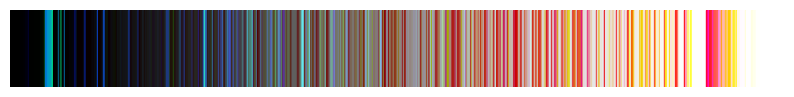

In [215]:
all_colors = []

for i in range(1, 182):
    extracting_colors(f'D:/Project/resized/resized/Andy_Warhol_{i}.jpg', 3)
for i in range(1, 25):
    extracting_colors(f'D:/Project/resized/resized/Jackson_Pollock_{i}.jpg', 3)
    
sorted_colors = sorted(all_colors)

fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Выборка американских художников у нас, конечно, жутко смещенная, но Поллок и Уорхол авторы великие, так что не рассмотреть их работы нельзя. И тут красного цвета невероятно много, так что: США -- красный цвет.

Дальше рассмотрим Беларусь и Израиль и картины великого художника -- Марка Шагала.

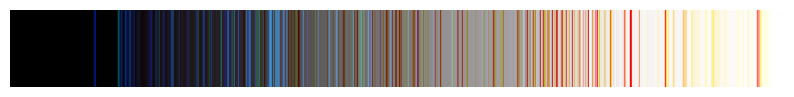

In [216]:
all_colors = []

for i in range(1, 240):
    extracting_colors(f'D:/Project/resized/resized/Marc_Chagall_{i}.jpg', 3)
    
sorted_colors = sorted(all_colors)

fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Видим, что преобладающий цвет на его картинах -- синий. Так что Беларусь и Израиль -- синий цвет.

И дальше рассмотрим итальянских художников.

In [217]:
nationality = 'Italian'
df_filtered = sorted_df[sorted_df['nationality'] == nationality]

df_filtered

,index,id,name,years,genre,nationality,paintings
29,0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
30,23,23,Giotto di Bondone,1266 - 1337,Proto Renaissance,Italian,119
31,24,24,Sandro Botticelli,1445 - 1510,Early Renaissance,Italian,164
32,25,25,Caravaggio,1571 - 1610,Baroque,Italian,55
33,26,26,Leonardo da Vinci,1452 - 1519,High Renaissance,Italian,143
34,32,32,Titian,1488 - 1576,"High Renaissance,Mannerism",Italian,255
35,47,47,Raphael,1483 – 1520,High Renaissance,Italian,109
36,48,48,Michelangelo,1475 – 1564,High Renaissance,Italian,49


Итальянских художников много, так что рассмтриваем не всех и иногда ограничиваем количество картин, чтобы снизить нагрузку на память.

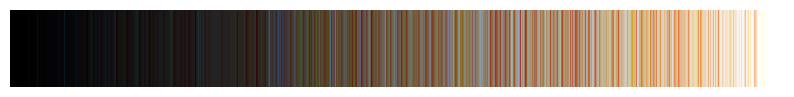

In [218]:
all_colors = []

for i in range(1, 100):
    extracting_colors(f'D:/Project/resized/resized/Amedeo_Modigliani_{i}.jpg', 2)
for i in range(1, 100):
    extracting_colors(f'D:/Project/resized/resized/Sandro_Botticelli_{i}.jpg', 2)
for i in range(1, 56):
    extracting_colors(f'D:/Project/resized/resized/Caravaggio_{i}.jpg', 2)
for i in range(1, 100):
    extracting_colors(f'D:/Project/resized/resized/Leonardo_da_Vinci_{i}.jpg', 2)
for i in range(1, 110):
    extracting_colors(f'D:/Project/resized/resized/Raphael_{i}.jpg', 2)
for i in range(1, 50):
    extracting_colors(f'D:/Project/resized/resized/Michelangelo_{i}.jpg', 2)
for i in range(1, 100):
    extracting_colors(f'D:/Project/resized/resized/Titian_{i}.jpg', 2)
    
sorted_colors = sorted(all_colors)

fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(sorted_colors):
    color_float = tuple(c/255 for c in color[0]) #Приводим цвета в более удобный формат
    rect = plt.Rectangle((i, 0), 1, 1, color=color_float) #Добавляем цвета на палетку
    ax.add_patch(rect)
plt.xlim((0, len(sorted_colors)))
plt.ylim((0, 1))
plt.axis('off')
plt.show()

Чёрного цвета много везде, о чём я уже и писал, но тут его преобладание становится настолько выделяющимся, что игнорировать это нельзя. Некоторая мрачность великих произведений Ренессанса взяла своё. Италия -- чёрный цвет.

### Часть 4. Карта.

Используем GeoPandas, чтобы выделить на карте страны, обсуждаемые выше, теми цветами, что мы нашли как преобладающие в них.

C:\Users\IliaP\AppData\Local\Temp\ipykernel_4252\3335714964.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #Загружаем карту мира


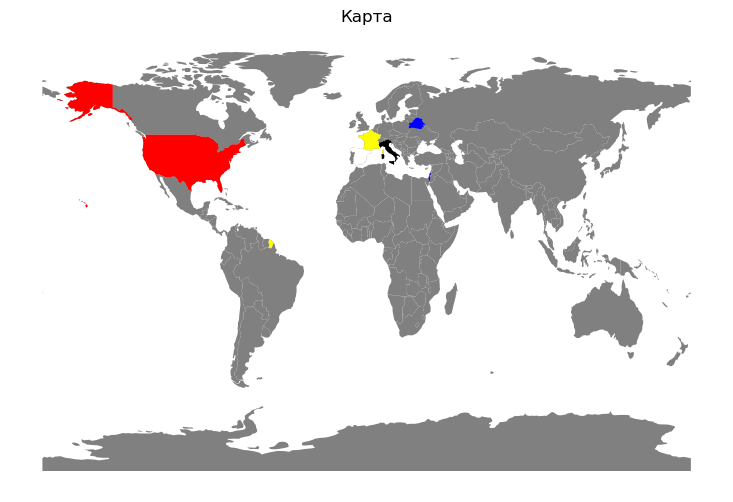

In [245]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #Загружаем карту мира

france = world[world['name'] == "France"] # Выбираем страны
spain = world[world['name'] == "Spain"]
usa = world[world['name'] == "United States of America"]
belarus = world[world['name'] == "Belarus"]
israel = world[world['name'] == "Israel"]
italy = world[world['name'] == "Italy"]

fig, ax = plt.subplots(figsize=(10, 6))

# Красим в определнный цвет
world.plot(ax=ax, color='gray')
france.plot(ax=ax, color="yellow")
spain.plot(ax=ax, color="white")
usa.plot(ax=ax, color="red")
belarus.plot(ax=ax, color="blue")
israel.plot(ax=ax, color="blue")
italy.plot(ax=ax, color="black")

ax.set_title("Карта")


plt.axis('off')
plt.show()